### KNN is a supervised machine learning method that classifies or regresses data based on the similarity of its neighbors.
### K number of neighbours are created and based on these created groups the model makes the predictions.
### if K=3 there will be three groups and based on these groups the model is trained. if a new data point comes the model checks the closeness with the created groups and makes predictions.
### distnace is calculated between the data points using two methods and these are defined below
## Manhattan Distance --> L1 = |X2-X1| + |Y2-Y1|
## Euclidean Distance --> L**2 = sqr((X2-X1)**2 + (Y2-Y1)**2)
### based on the dataset the distance method is used

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# load the dataset
d_set=pd.read_csv("Social_Network_Ads.csv")
d_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


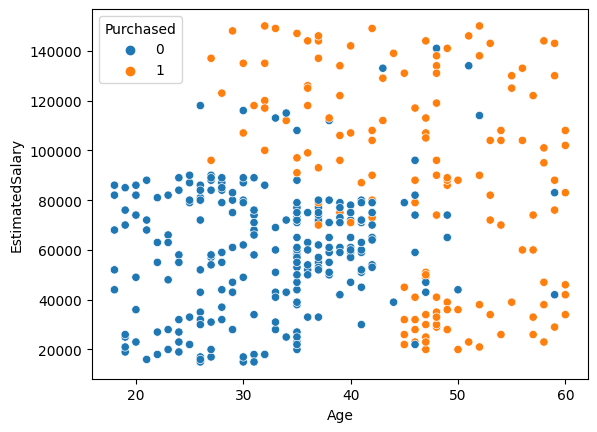

In [25]:
# plot
sns.scatterplot(x=d_set['Age'], y=d_set['EstimatedSalary'], data=d_set, hue=d_set['Purchased'])
plt.show()

In [26]:
# separating the input and output data
x=d_set[['Age', 'EstimatedSalary']]
y=d_set['Purchased']

# scalling the data because the age numbers are far less than those of salary values
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x)

# now make dataframe
x=pd.DataFrame(sc.transform(x), columns=x.columns)

In [27]:
# split the data
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2)

# model
knn=KNeighborsClassifier(n_neighbors=5) # here the values of k is kept 5

# now fit the data
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [28]:
# scores
print("training--> ", knn.score(xtrain, ytrain)*100, "\n", "testing--> ",knn.score(xtest, ytest)*100)


training-->  90.625 
 testing-->  87.5


### rsult: from above scores it is clear that there is neither underfitting nor overfitting problems

In [29]:
d_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [30]:
# sample prediction on (36	33000	0)
knn.predict([[36, 33000]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### result: wrong prediction

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


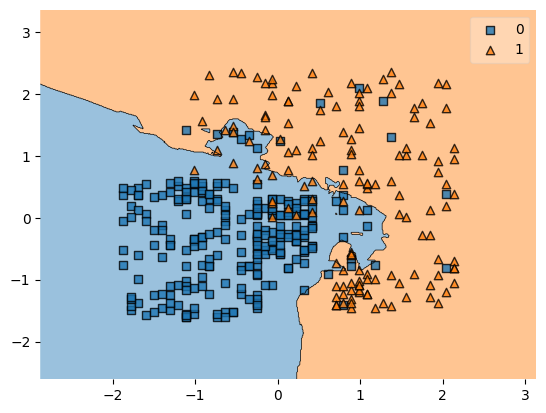

In [43]:
# plotbthe boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
plt.show()

### to solve this problem we will apply following imbalance technique

In [31]:
# value count in purchased column
d_set['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [32]:
# applying under sampling tech
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler()
rus_x, rus_y=rus.fit_resample(x,y)

In [33]:
rus_y.value_counts()

0    143
1    143
Name: Purchased, dtype: int64

In [34]:
# now again training the model
x_train, x_test, y_train, y_test=train_test_split(rus_x, rus_y, test_size=0.2)

# model
knnr=KNeighborsClassifier(n_neighbors=5)

# fit the data
knnr.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
# scores
print("training--> ", knnr.score(x_train, y_train)*100, "\n", "testing--> ",knnr.score(x_test, y_test)*100)

training-->  92.10526315789474 
 testing-->  89.65517241379311


### result: no problems

In [37]:
d_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [38]:
# sample prediction on (49	36000	1)
knnr.predict([[49, 33000]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### result: right prediction

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


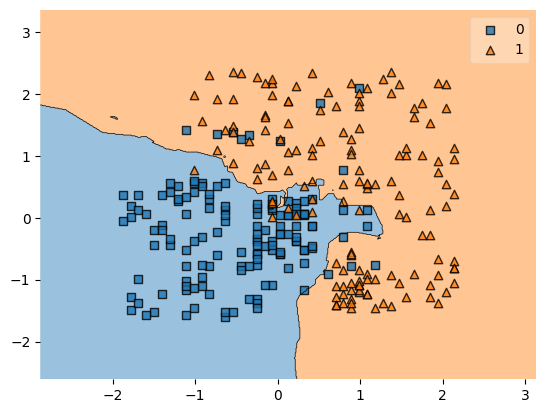

In [42]:
# plotbthe boundary
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(rus_x.to_numpy(), rus_y.to_numpy(), clf=knnr)
plt.show()